In [2]:
!wget https://www.wonderplugin.com/videos/demo-image0.jpg

--2019-03-15 19:56:44--  https://www.wonderplugin.com/videos/demo-image0.jpg
Resolving www.wonderplugin.com (www.wonderplugin.com)... 96.126.107.167
Connecting to www.wonderplugin.com (www.wonderplugin.com)|96.126.107.167|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 115173 (112K) [image/jpeg]
Saving to: ‘demo-image0.jpg’

demo-image0.jpg     100%[===================>] 112.47K   570KB/s    in 0.2s    

2019-03-15 19:56:45 (570 KB/s) - ‘demo-image0.jpg’ saved [115173/115173]



In [0]:
import torch
import cv2 
%matplotlib inline
from matplotlib import pyplot as plt

In [0]:
im_orig = cv2.imread('demo-image0.jpg', 0)

im = torch.tensor(im_orig, dtype=torch.float).unsqueeze(0).unsqueeze(0)

In [0]:
from torch import nn 
import torch

class EdgeDetector(nn.Module):
  def __init__(self):
    super(EdgeDetector, self).__init__()
    
    self.filter_vert = nn.Conv2d(1, 1, 3, 1, 1, bias=False)
    self.filter_horz = nn.Conv2d(1, 1, 3, 1, 1, bias=False)

    
  def forward(self, im):
    return torch.sqrt(self.filter_vert(im)**2 + self.filter_horz(im)**2)

edgeDetector = EdgeDetector()

  
edgeDetector.filter_vert.weight.data = torch.Tensor([[[[-1, -1, -1], [0, 0, 0], [1, 1, 1]]]])
edgeDetector.filter_horz.weight.data = torch.Tensor([[[[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]]])



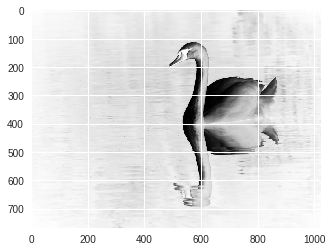

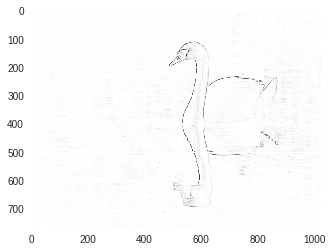

In [6]:
im = edgeDetector(im).squeeze()

plt.imshow(im_orig)
plt.show()

plt.imshow(im.detach().numpy())
plt.show()

